In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [2]:
f = lambda x1, x2: 0.2*np.log(x1) + 0.4*np.log(x2)
# g1 = lambda x1, x2: 1*(0.43*np.log(x1-0.5)+1.1+x1-x2>0)
# g2 = lambda x1, x2: 1*(x2+0.35*np.log(x1)-2*x1**2+0.6>0)
# g3 = lambda x1, x2: 1*(-x2+1.1*x1+0.4>0)
# g4 = lambda x1, x2: 1*(-x2-1.5*x1+2.6>0)

g1 = lambda x1, x2: 1*(0.43*np.log(x1-0.5)+1.1+x1-x2>0)
g2 = lambda x1, x2: 1*(x2-0.33*np.log(x1-0.4)-1.2+0.2*x1>0)
g3 = lambda x1, x2: 1*(-x2+1.1*x1+0.3>0)
g4 = lambda x1, x2: 1*(-x2-1.5*x1+2.6>0)

g = lambda x1, x2: g1(x1,x2)*g2(x1,x2)*g3(x1,x2)*g4(x1,x2)
g34 = lambda x1, x2: g3(x1,x2)*g4(x1,x2)

In [3]:
def cmap_gen(color):
    return LinearSegmentedColormap.from_list('foo', ['w',color], 2)
    
def draw_contour(func, x1_lim, x2_lim, cm=None, N = 1000, ax=None, fig=None, contour=False, lname='', **kwargs):
    
    if cm is None:
        cm = LinearSegmentedColormap.from_list('foo', ['w','tab:orange'], 2)
        
    if ax is None and fig is None:
        fig = plt.figure()
        ax = fig.add_subplot()

    x1 = np.linspace(x1_lim[0],x1_lim[1], N)
    x2 = np.linspace(x2_lim[0],x2_lim[1], N)

    x1m, x2m = np.meshgrid(x1, x2)
    
    z = func(x1m, x2m)
    
    if contour:
        cntr = ax.contour(x1,x2,z,cmap=cm, **kwargs)
    else:
        cntr = ax.contourf(x1,x2,z,cmap=cm,alpha=0.2, **kwargs)
        
    return fig, ax, cntr

def draw_contour_from_df(dfl, x1_lim, x2_lim, cm=None, ax=None, fig=None, contour=False, lname='', **kwargs):
    if cm is None:
        cm = LinearSegmentedColormap.from_list('foo', ['w','tab:orange'], 2)
        
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot()
    
    x1,x2,y = dfl['x[1]'].to_numpy(),dfl['x[2]'].to_numpy(), dfl['Y'].to_numpy() 
    
    x1 = x1.reshape((np.sqrt(x1.shape[0]).astype(np.int32), -1)).T
    x2 = x2.reshape((np.sqrt(x2.shape[0]).astype(np.int32), -1)).T
    y = y.reshape((np.sqrt(y.shape[0]).astype(np.int32), -1)).T

    
    
    if contour:
        cntr = ax.contour(x1, x2, y, cmap=cm, **kwargs)
    else:
        cntr = ax.contourf(x1, x2, y, cmap=cm, alpha=0.2, **kwargs)
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xlim(x1_lim)
    ax.set_ylim(x2_lim)
    return fig, ax, cntr

def draw_scatter(df, x, y, label, color_map=None, ax=None, fig=None):
    
    ax.autoscale(False)
    
    for val in df[label].unique():
        df_sub = df[df[label] == val]
        xx, yy = df_sub[x].to_numpy(), df_sub[y].to_numpy()
        ax.scatter(xx, yy, label=val, edgecolors='white', marker='o', s=60)

def full_draw_constraint(df, func, x1_lim, x2_lim, ax=None, fig=None):
    cm = LinearSegmentedColormap.from_list('foo', ['w','tab:orange'], 2)

    fig, ax, _ = draw_contour(func, x1_lim, x2_lim, cm, fig=fig, ax=ax)
    draw_scatter(df, 'x[1]', 'x[2]', 'feasible', fig=fig, ax=ax)

    ax.legend(loc='lower right')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    return fig, ax

In [4]:
x1_lim = (0.51, 1.5)
x2_lim = (0.3, 1.6)

#x1_lim = (0.51, 3)
#x2_lim = (0.3, 3)

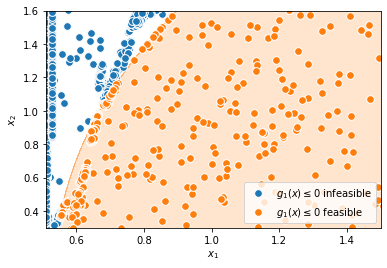

In [5]:
i = 2

df = pd.read_csv(f'./main_{i}.csv')
dfl = pd.read_csv(f'./lnr_{i}.csv')
df['feasible'] = df['Y'].apply(lambda x: '$g_1(x)\leq 0$ feasible' if x>0 else '$g_1(x)\leq 0$ infeasible')

#sns.scatterplot(data=df, x='x[1]', y='x[2]', hue='feasible')
fig, ax = full_draw_constraint(df, g1, x1_lim, x2_lim)
fig.savefig('img/g1.svg', format='svg')

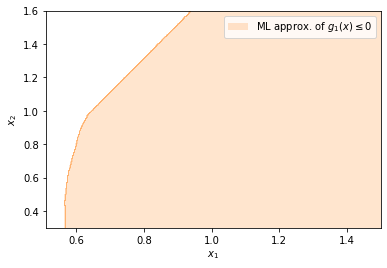

In [6]:
#fig, ax = draw_contour(g1, x1_lim, x2_lim, cm)
#draw_contour_from_df(dfl, x1_lim, x2_lim, ax=ax, fig=fig, cm=cmap_gen('tab:blue'))
fig, ax, cnt = draw_contour_from_df(dfl, x1_lim, x2_lim, cm=cmap_gen('tab:orange'))
ax.legend([cnt.legend_elements()[0][-1]], ['ML approx. of $g_1(x)\leq 0$'])
fig.savefig('img/g1_approx.svg', format='svg')

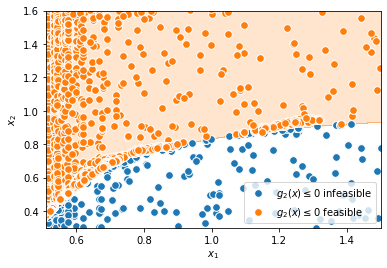

In [7]:
i = 3

df = pd.read_csv(f'./main_{i}.csv')
df['feasible'] = df['Y'].apply(lambda x: '$g_2(x)\leq 0$ feasible' if x>0 else '$g_2(x)\leq 0$ infeasible')
dfl = pd.read_csv(f'./lnr_{i}.csv')

#sns.scatterplot(data=df, x='x[1]', y='x[2]', hue='feasible')
fig, ax = full_draw_constraint(df, g2, x1_lim, x2_lim)
fig.savefig('img/g2.svg', format='svg')

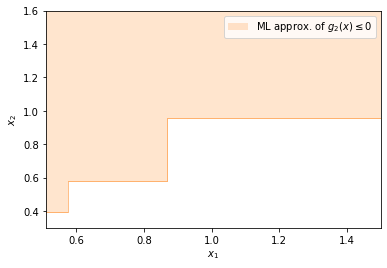

In [18]:
fig, ax, cnt = draw_contour_from_df(dfl, x1_lim, x2_lim)
ax.legend([cnt.legend_elements()[0][-1]], ['ML approx. of $g_2(x)\leq 0$'])
fig.savefig('img/g2_approx.svg', format='svg')

In [978]:
#x, y, z = df['x[1]'].to_numpy(), df['x[2]'].to_numpy(), df['feasible'].to_numpy()

#plt.tricontourf(x, y, z, levels=[0, 1])
#sns.displot(data=df, x='x[1]', y='x[2]', hue='feasible',binwidth=0.2)

# Correct and approximation

In [101]:
x1_lim = (0.45, 1.5)
x2_lim = (0.4, 1.5)

In [108]:
df2 = pd.read_csv(f'./lnr_{2}.csv')
df3 = pd.read_csv(f'./lnr_{3}.csv')

In [109]:
df2['Y'] = df2['Y']*df3['Y']
df2['Y'] = df2['Y']*g34(df2['x[1]'].to_numpy(), df2['x[2]'].to_numpy())

C:\Users\marga\AppData\Local\Temp/ipykernel_14620/625253516.py:7: RuntimeWarning: invalid value encountered in log
  g1 = lambda x1, x2: 1*(0.43*np.log(x1-0.5)+1.1+x1-x2>0)


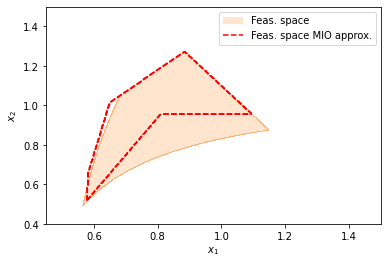

In [110]:
fig, ax, cnt1 = draw_contour(g, x1_lim, x2_lim,  cm=cmap_gen('tab:orange'))
_,_,cnt2 = draw_contour_from_df(df2, x1_lim, x2_lim, cm=cmap_gen('red'), fig=fig, ax=ax, 
                                contour=True, linestyles='dashed')

h1,_ = cnt.legend_elements()
h2,_ = cnt2.legend_elements()

ax.legend([h1[-1], h2[-1]], ['Feas. space', 'Feas. space MIO approx.'])

fig.savefig('img/feas_approx.svg', format='svg')

# Solution path

In [983]:
from matplotlib.patches import PathPatch, Path, Arrow

In [984]:
df_p = pd.read_csv('solution_history.csv')
x1p, x2p = df_p['x[1]'].to_numpy(), df_p['x[2]'].to_numpy()

In [1011]:
df_p

,x[1],x[2],x[3]
0,1.043035,1.035447,-0.104304
1,1.063649,1.004526,-0.106365
2,1.086120,0.970820,-0.108612
3,1.108574,0.937140,-0.110857
4,1.130824,0.903764,-0.113082
5,1.152124,0.871814,-0.115212
6,1.152092,0.871862,-0.115209
7,1.149959,0.875062,-0.114996
8,1.149749,0.875376,-0.114975


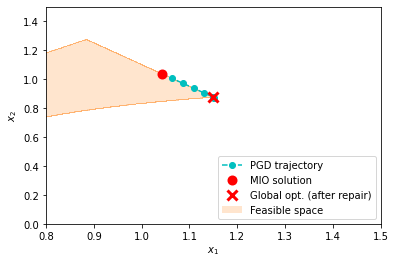

In [1001]:
x1_lim = (0.8, 1.5)
x2_lim = (0, 1.5)

# x1_lim = (0.45, 0.7)
# x2_lim = (0, 0.7)
# x1_lim = (x1p.min()*0.98,x1p.max()*1.01)
# x2_lim = (x2p.min()*0.92,x2p.max()*1.2)

fig, ax, cnt1 = draw_contour(g, x1_lim, x2_lim,  cm=cmap_gen('tab:orange'))
ax.plot(x1p, x2p, 'co', linestyle="--", label='PGD trajectory')
ax.plot([x1p[0]], [x2p[0]], 'ro',  label='MIO solution', markersize=8,markeredgewidth=2)#linestyle="--",
ax.plot([x1p[-1]], [x2p[-1]], 'rx',  label='Global opt. (after repair)', markersize=10,markeredgewidth=3)#linestyle="--",

handles, labels = ax.get_legend_handles_labels()
handles.append(cnt1.legend_elements()[0][-1])
labels.append('Feasible space')

ax.legend(handles, labels, numpoints=1,loc='lower right')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# h1,_ = cnt1.legend_elements()
# h2,_ = cnt2.legend_elements()

# ax.legend([h1[-1], h2[-1]], ['Feas. space', 'Feas. space MIO approx.'])

fig.savefig('img/pgd_path.svg', format='svg')

In [915]:
def plot_track(verts, ax, **kw_args):
    '''Plot followed track: verts is 2D array: x, y'''
    for xy0, xy1 in zip(verts[:-1], verts[1:]):
        patch = Arrow(*xy0, *(xy1 - xy0), **kw_args)
        ax.add_patch(patch)
    ax.relim()
    ax.autoscale_view()

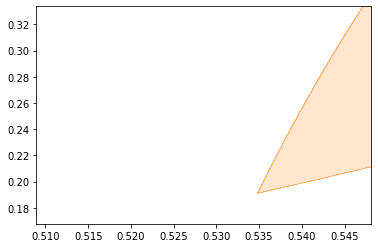

In [526]:
fig, ax, cnt1 = draw_contour(g, x1_lim, x2_lim,  cm=cmap_gen('tab:orange'))

In [539]:
verts = np.vstack([x1p, x2p]).T

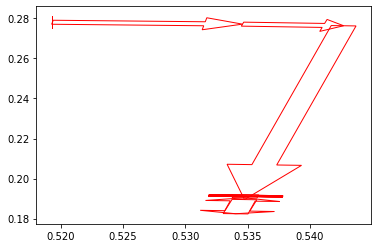

In [545]:
fig, ax = plt.subplots()


plot_track(verts, ax, color='red', fill=False, width=0.01)